# Atividade Final - Análise de Dados com Pandas e PySpark
    Disciplina: Arquitetura de Dados

# Introdução

Fonte: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

Objetivo: Análise comparativa de desempenho entre Pandas e PySpark



# 1. Importação de Bibliotecas


In [1]:
import pandas as pd
import pyspark
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import time
from pyspark.sql.functions import col, when

# 2. Leitura do Dataset

## 2.1 - Dataset Credits

In [6]:
spark = SparkSession.builder.appName("Análise com PySpark").getOrCreate()

df_pd_credits = pd.read_csv('/content/tmdb_5000_credits.csv')
df_spark_credits = spark.read.csv('/content/tmdb_5000_credits.csv', header=True, inferSchema=True)

## 2.2 - Dataset Movies

In [11]:
df_pd_movies = pd.read_csv('/content/tmdb_5000_movies.csv')
df_spark_movies = spark.read.csv('/content/tmdb_5000_movies.csv', header=True, inferSchema=True)

# 3. Análise Inicial

## 3.1 - Dataset Credits

In [10]:
print("Pandas Info:\n", df_pd_credits.info())
print("Pandas Descrição:\n", df_pd_credits.describe())
print("Valores Nulos (Pandas):\n", df_pd_credits.isnull().sum())
print("Duplicados (Pandas):", df_pd_credits.duplicated().sum())

print("\nSchema (PySpark):")
df_spark_credits.printSchema()
df_spark_credits.describe().show()
df_spark_credits.select([when(col(c).isNull(), 1).otherwise(0).alias(c) for c in df_spark_credits.columns]).summary().show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB
Pandas Info:
 None
Pandas Descrição:
             movie_id
count    4803.000000
mean    57165.484281
std     88694.614033
min         5.000000
25%      9014.500000
50%     14629.000000
75%     58610.500000
max    459488.000000
Valores Nulos (Pandas):
 movie_id    0
title       0
cast        0
crew        0
dtype: int64
Duplicados (Pandas): 0

Schema (PySpark):
root
 |-- movie_id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- crew: string (nullable = true)

+-------+------------------+------------------+-----------------+--------------------+
|summary

## 3.2 - Dataset Movies


In [12]:
print("Pandas Info:\n", df_pd_movies.info())
print("Pandas Descrição:\n", df_pd_movies.describe())
print("Valores Nulos (Pandas):\n", df_pd_movies.isnull().sum())
print("Duplicados (Pandas):", df_pd_movies.duplicated().sum())

print("\nSchema (PySpark):")
df_spark_movies.printSchema()
df_spark_movies.describe().show()
df_spark_movies.select([when(col(c).isNull(), 1).otherwise(0).alias(c) for c in df_spark_movies.columns]).summary().show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

# 4. Limpeza dos Dados

## 4.1 - Dataset Credits


In [14]:
df_pd_credits.drop_duplicates(inplace=True)
df_pd_credits.dropna(inplace=True)

df_spark_credits = df_spark_credits.dropDuplicates()
df_spark_credits = df_spark_credits.na.drop()

## 4.2 - Dataset Movies

In [25]:
df_pd_movies.drop_duplicates(inplace=True)
df_pd_movies.dropna(inplace=True)

df_spark_movies = df_spark_movies.dropDuplicates()
df_spark_movies = df_spark_movies.na.drop()

# 5. Transformações

## 5.1 - Dataset Movies

In [ ]:
# O data set de creditos apenas nos trás dados sobre os creditos dos filme, como titulo e elenco. Neste caso não e interessante e possível realizar nenhuma transformação.

In [33]:
# Criar coluna "lucro" como receita - orçamento
df_pd_movies['lucro'] = df_pd_movies['revenue'] - df_pd_movies['budget']
df_spark_movies = df_spark_movies.withColumn('lucro', col('revenue') - col('budget'))

print('No pandas coluna lucro')
print(df_pd_movies['lucro'])

print('No pyspark coluna lucro')
df_spark_movies.select('lucro').show()

No pandas coluna lucro
0       2550965087
1        661000000
2        635674609
3        834939099
4         24139100
           ...    
4773       3124130
4781        -22000
4791           -13
4796        417760
4801             0
Name: lucro, Length: 1493, dtype: int64
No pyspark coluna lucro
+------------------+
|             lucro|
+------------------+
|           1.73892|
|     -1.29998505E8|
|   -9999996.080943|
|   -9999992.055543|
|      -1.9992781E8|
|      -5.9961679E7|
|     -1.64822428E8|
|      -3.1996011E7|
|      -3.9931821E7|
|-1.4999999664805E7|
|      -7.4944699E7|
|      -7.4976602E7|
|      -5.9862894E7|
|      -1.4998164E8|
|     -1.49993521E8|
|-1.4999998102239E7|
|     -1.74702239E8|
|      -5.9999192E7|
|      -1.4989815E7|
|   -3999989.210088|
+------------------+
only showing top 20 rows



In [48]:
# Filtro: apenas filmes com lucro positivo
df_lucro_pd = df_pd_movies[df_pd_movies['lucro'] > 0]
df_lucro_spark = df_spark_movies.filter(col('lucro') > 0)


# Filtro: apenas filmes com lucro positivo
df_lucro_pd = df_pd_movies[df_pd_movies['lucro'] > 0]
df_lucro_spark = df_spark_movies.filter(col('lucro') > 0)

print('No pandas')
print(df_lucro_pd[['title', 'lucro']])

print('No pyspark ')
df_lucro_spark.select('title','lucro').show()

No pandas
                                         title       lucro
0                                       Avatar  2550965087
1     Pirates of the Caribbean: At World's End   661000000
2                                      Spectre   635674609
3                        The Dark Knight Rises   834939099
4                                  John Carter    24139100
...                                        ...         ...
4738                                        Pi     3161152
4752                            Tiny Furniture      351498
4766                            The Last Waltz      321952
4773                                    Clerks     3124130
4796                                    Primer      417760

[1056 rows x 2 columns]
No pyspark 
+--------------------+---------+
|               title|    lucro|
+--------------------+---------+
|"[{""iso_3166_1""...|  1.73892|
|          2013-12-13| 5.377155|
|       {""id"": 6270|  11887.0|
|"[{""iso_3166_1""...| 3.659292|
| {""name"": "

# 6. Análise Exploratória (Pandas)

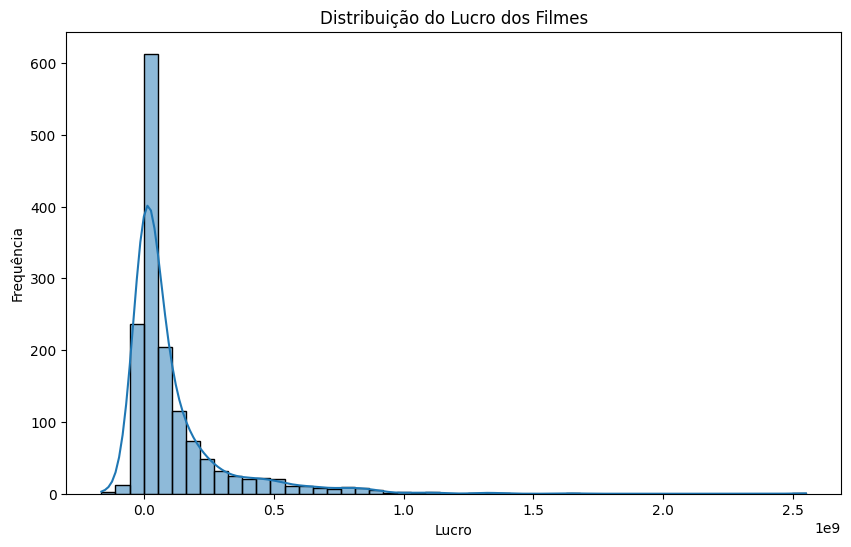

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df_pd_movies['lucro'], bins=50, kde=True)
plt.title("Distribuição do Lucro dos Filmes")
plt.xlabel("Lucro")
plt.ylabel("Frequência")
plt.show()

In [50]:
# Filme mais rentável (Pandas)

filme_mais_rentavel = df_pd_movies.loc[df_pd_movies['lucro'].idxmax()]
print("\nFilme mais rentável (Pandas):")
print(filme_mais_rentavel[['title', 'lucro']])


Filme mais rentável (Pandas):
title        Avatar
lucro    2550965087
Name: 0, dtype: object


In [52]:
# Filme mais rentável por gênero (Pandas)

if 'genres' in df_pd_movies.columns:
    lucro_por_genero = df_pd_movies.groupby('genres')[['lucro']].max().sort_values(by='lucro', ascending=False)
    print("\nFilme mais rentável por gênero (Pandas):")
    print(lucro_por_genero)


Filme mais rentável por gênero (Pandas):
                                                         lucro
genres                                                        
[{"id": 28, "name": "Action"}, {"id": 12, "name...  2550965087
[{"id": 18, "name": "Drama"}, {"id": 10749, "na...  1645034188
[{"id": 28, "name": "Action"}, {"id": 12, "name...  1363528810
[{"id": 28, "name": "Action"}]                      1316249360
[{"id": 878, "name": "Science Fiction"}, {"id":...  1299557910
...                                                        ...
[{"id": 12, "name": "Adventure"}, {"id": 16, "n...   -61403089
[{"id": 16, "name": "Animation"}, {"id": 28, "n...   -64926294
[{"id": 14, "name": "Fantasy"}, {"id": 28, "nam...   -68351500
[{"id": 53, "name": "Thriller"}, {"id": 878, "n...   -74010360
[{"id": 28, "name": "Action"}, {"id": 12, "name...  -165710090

[555 rows x 1 columns]


In [68]:
# # Filme mais rentável (PySpark)
# # Não consegui resolver este erro, por isso deixei comentado.
# from pyspark.sql.functions import get_json_object

# # Se a coluna 'title' for um JSON, extrair o campo 'name'

# df_spark_rentavel_nome = df_spark_movies.withColumn("title_name", get_json_object(col("title"), "$.name"))
# titulo_mais_rentavel = df_spark_rentavel_nome.orderBy(col('lucro').desc()).select('title_name').first()
# print("\nFilme mais rentável (PySpark):")
# if titulo_mais_rentavel and 'title_name' in titulo_mais_rentavel.asDict():
#     print(titulo_mais_rentavel['title_name'])
# else:
#     print("Nome do título não disponível ou estrutura inválida.")


Filme mais rentável (PySpark):
None


In [67]:
# Filme mais rentável por gênero (PySpark)

from pyspark.sql.functions import max as spark_max

if 'genres' in df_spark_movies.columns:
    df_spark_movies.groupBy('genres').agg(spark_max('lucro').alias('lucro_max')).orderBy(col('lucro_max').desc()).show()

+----------------+------------+
|          genres|   lucro_max|
+----------------+------------+
|   "[{""id"": 28|    333355.0|
|   "[{""id"": 35|     11887.0|
|   "[{""id"": 14|      2008.0|
|   "[{""id"": 18|   17.074843|
|   "[{""id"": 99|    3.291609|
|   "[{""id"": 27|    1.563711|
|   "[{""id"": 36|     0.59458|
|"[{""id"": 10402|     0.46049|
|   "[{""id"": 53|     0.43049|
|              []|         0.0|
| "[{""id"": 9648|-1.4989815E7|
|   "[{""id"": 12|-1.5989009E7|
|   "[{""id"": 16|-3.9931821E7|
|   "[{""id"": 80|-4.4941767E7|
|"[{""id"": 10752|-4.9683848E7|
|  "[{""id"": 878|-6.9983134E7|
+----------------+------------+



# 7. Comparação de Desempenho

In [40]:
start = time.time()
df_pd_movies['lucro'] = df_pd_movies['revenue'] - df_pd_movies['budget']
print("Tempo Pandas:", time.time() - start)

start = time.time()
df_spark_movies = df_spark_movies.withColumn('lucro', col('revenue') - col('budget'))
print("Tempo PySpark:", time.time() - start)

Tempo Pandas: 0.0011174678802490234
Tempo PySpark: 0.02512359619140625


8. Conclusão

In [41]:
print("""
Conclusão:
- Pandas é mais simples e rápido para conjuntos de dados pequenos e médios.
- PySpark se destaca em escalabilidade para grandes volumes de dados.
- A combinação das duas ferramentas permite uma abordagem versátil para diferentes cenários de análise de dados.
""")


Conclusão:
- Pandas é mais simples e rápido para conjuntos de dados pequenos e médios.
- PySpark se destaca em escalabilidade para grandes volumes de dados.
- A combinação das duas ferramentas permite uma abordagem versátil para diferentes cenários de análise de dados.

